In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/credit-card/Creditcard_data.csv')

In [3]:
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [4]:
df = pd.concat([X_train,y_train],axis = 1)

In [5]:
fraudulent1 = df[df['Class'] == 1]
non_fraudulent1 = df[df['Class'] == 0].sample(n=len(fraudulent1), random_state=42)

balanced_data_random_under = pd.concat([fraudulent1, non_fraudulent1])

In [6]:
fraudulent2 = df[df['Class'] == 1]
non_fraudulent2 = df[df['Class'] == 0]

fraudulent_over = fraudulent2.sample(n=len(non_fraudulent2), replace=True, random_state=42)

balanced_data_random_over = pd.concat([fraudulent_over, non_fraudulent2])

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']

nm = NearMiss(sampling_strategy='auto')
X_resampled, y_resampled = nm.fit_resample(X, y)

balanced_data_nearmiss = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Class')], axis=1)

In [8]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

balanced_data_smote = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Class')], axis=1)

In [9]:
from imblearn.combine import SMOTEENN

X = df.drop('Class', axis=1)
y = df['Class']

smoteenn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

balanced_data_smoteenn = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Class')], axis=1)


In [10]:
# Feature columns and target column
X_cols = df.columns[:-1]  # Assuming the last column is the target column
y_col = 'Class'

# Initialize the model
model = LogisticRegression(random_state=42)

# List to store accuracy scores for each technique
accuracy_scores = []


In [11]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

balanced_data_smote = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Class')], axis=1)

In [12]:
from imblearn.combine import SMOTEENN

X = df.drop('Class', axis=1)
y = df['Class']

smoteenn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

balanced_data_smoteenn = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Class')], axis=1)

In [13]:
# Iterate over each balanced dataset
for balanced_data in [balanced_data_random_under, balanced_data_random_over, balanced_data_nearmiss,balanced_data_smoteenn,balanced_data_smote]:
    # Split the data into features and target
    X_balanced = balanced_data[X_cols]
    y_balanced = balanced_data[y_col]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Calculate accuracy and store it in the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Display the accuracy scores for each sampling technique
for i, score in enumerate(accuracy_scores):
    print(f"Accuracy for Sampling Technique {i + 1}: {score}")

Accuracy for Sampling Technique 1: 0.75
Accuracy for Sampling Technique 2: 0.9344262295081968
Accuracy for Sampling Technique 3: 0.25
Accuracy for Sampling Technique 4: 0.9659090909090909
Accuracy for Sampling Technique 5: 0.9221311475409836


In [14]:
X_cols = df.columns[:-1]  # Assuming the last column is the target column
y_col = 'Class'


In [15]:
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

In [16]:
results_list = []
for clf_name, clf in classifiers.items():
    print(f"\nResults for {clf_name}:")
    for i, balanced_data in enumerate([balanced_data_random_under, balanced_data_random_over, balanced_data_nearmiss,balanced_data_smoteenn,balanced_data_smote]):
        # Split the data into features and target
        X_balanced = balanced_data[X_cols]
        y_balanced = balanced_data[y_col]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

        # Train the model
        clf.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Display the accuracy for the current sampling technique and classifier
        print(f"Accuracy for Sampling Technique {i + 1}: {accuracy}")
        
        results_list.append({'Classifier': clf_name, 'Sampling Technique': f'Technique {i + 1}', 'Accuracy': accuracy})
    # Convert the list to a DataFrame
results_df = pd.DataFrame(results_list).reset_index(drop=True)
print(results_df)


Results for Logistic Regression:
Accuracy for Sampling Technique 1: 0.75
Accuracy for Sampling Technique 2: 0.9344262295081968
Accuracy for Sampling Technique 3: 0.25
Accuracy for Sampling Technique 4: 0.9659090909090909
Accuracy for Sampling Technique 5: 0.9221311475409836

Results for Random Forest:
Accuracy for Sampling Technique 1: 0.5
Accuracy for Sampling Technique 2: 1.0
Accuracy for Sampling Technique 3: 0.75
Accuracy for Sampling Technique 4: 0.9943181818181818
Accuracy for Sampling Technique 5: 0.9959016393442623

Results for SVM:
Accuracy for Sampling Technique 1: 0.75
Accuracy for Sampling Technique 2: 0.7295081967213115
Accuracy for Sampling Technique 3: 0.25
Accuracy for Sampling Technique 4: 0.7613636363636364
Accuracy for Sampling Technique 5: 0.680327868852459
             Classifier Sampling Technique  Accuracy
0   Logistic Regression        Technique 1  0.750000
1   Logistic Regression        Technique 2  0.934426
2   Logistic Regression        Technique 3  0.250000

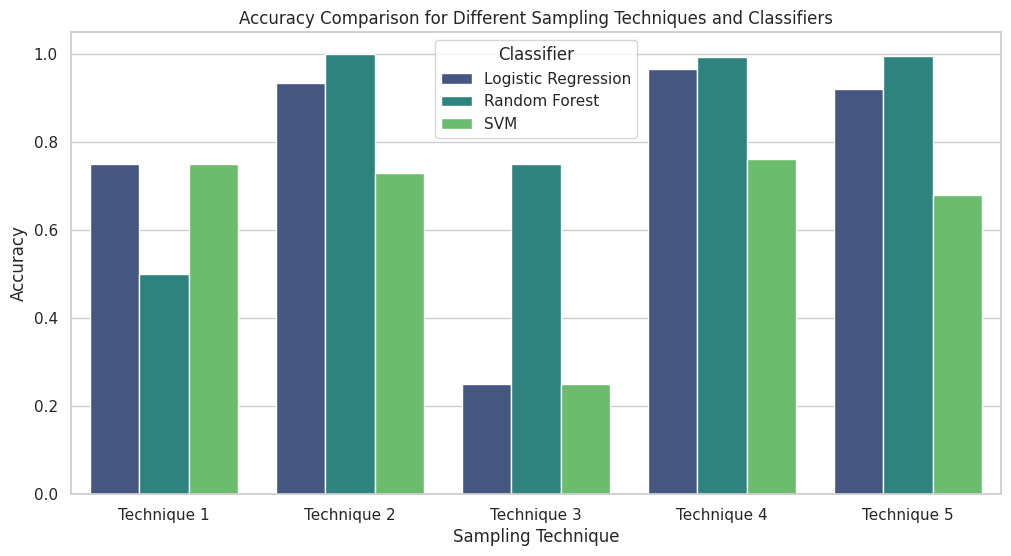

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x="Sampling Technique", y="Accuracy", hue="Classifier", data=results_df, palette="viridis")

plt.title("Accuracy Comparison for Different Sampling Techniques and Classifiers")
plt.xlabel("Sampling Technique")
plt.ylabel("Accuracy")

plt.show()